In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# zscore
from scipy.stats import zscore
# scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import *
# partitioning
from sklearn.model_selection import train_test_split
# naive bayes
from sklearn.naive_bayes import GaussianNB, CategoricalNB
# plot things
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve

In [12]:
df_ini = pd.read_csv(r"C:\Users\Steffania\Documents\Projects 1st semester\DM Project\ravdess_dm1_dataset\ravdess_features.csv")

In [13]:
#df = df_ini.copy()
df = df_ini.copy()

In [14]:
nunique = df.nunique()
to_delete = []
for key, value in nunique.items():
    if(value == 1):
        print("To delete: ", key)
        to_delete.append(key)
    if(value > 1 and value < 100):
        print("To evaluate: ", key)
df = df.drop(columns=to_delete)
df = df.drop(columns=["mean"])

To delete:  modality
To evaluate:  vocal_channel
To evaluate:  emotion
To evaluate:  emotional_intensity
To evaluate:  statement
To evaluate:  repetition
To evaluate:  actor
To evaluate:  sex
To evaluate:  channels
To delete:  sample_width
To delete:  frame_rate
To evaluate:  frame_width
To evaluate:  length_ms
To delete:  stft_max


In [15]:
def get_emotion_positivity(x):
    if(x == 'fearful' or x == 'angry' or x =='sad' or x == 'disgust'):
        return -1;
    if(x == 'happy' or x == 'surprised'): # is calm positive?
        return 1;
    return 0;

df["emotion_positivity"] = df["emotion"].map(get_emotion_positivity)

In [16]:
df["length"] = df["length_ms"] / 1000
df["zero_crossings_rate"] = df["zero_crossings_sum"] / df["length"]
df = df.drop(columns=["length_ms","zero_crossings_sum"])
df['statement'] = df['statement'].replace(['Dogs are sitting by the door'], 'S1')
df['statement'] = df['statement'].replace(['Kids are talking by the door'], 'S2')

In [17]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,2442,2443,2444,2445,2446,2447,2448,2449,2450,2451
vocal_channel,speech,speech,NaN,NaN,song,speech,speech,speech,speech,song,...,song,speech,speech,speech,NaN,speech,speech,song,speech,NaN
emotion,fearful,angry,happy,surprised,happy,fearful,angry,neutral,calm,sad,...,sad,calm,neutral,surprised,sad,calm,calm,sad,surprised,neutral
emotional_intensity,normal,normal,strong,normal,strong,normal,normal,normal,normal,strong,...,strong,normal,normal,strong,normal,strong,normal,strong,normal,normal
statement,S1,S1,S1,S2,S1,S1,S1,S1,S1,S1,...,S2,S2,S2,S1,S2,S2,S1,S1,S2,S1
repetition,2nd,1st,2nd,1st,2nd,2nd,1st,2nd,1st,2nd,...,2nd,1st,2nd,1st,2nd,1st,1st,2nd,1st,2nd
actor,2.0,16.0,16.0,14.0,2.0,NaN,2.0,NaN,12.0,12.0,...,NaN,NaN,NaN,NaN,23.0,23.0,23.0,23.0,NaN,23.0
sex,F,F,F,F,F,F,F,F,F,F,...,M,M,M,M,M,M,M,M,M,M
channels,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
frame_width,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
frame_count,179379.0,187387.0,224224.0,174575.0,211411.0,171371.0,180980.0,164965.0,180981.0,209810.0,...,233834.0,184184.0,168168.0,155356.0,240240.0,221021.0,200200.0,251451.0,179379.0,184184.0


In [19]:
df = df.drop(columns = ["actor", "channels", "frame_width","statement", "repetition","vocal_channel"]).dropna()
df.T

,0,2,3,4,5,7,8,13,14,15,...,2438,2439,2440,2441,2442,2443,2446,2448,2450,2451
emotion,fearful,happy,surprised,happy,fearful,neutral,calm,calm,sad,sad,...,fearful,calm,neutral,sad,sad,calm,sad,calm,surprised,neutral
emotional_intensity,normal,strong,normal,strong,normal,normal,normal,strong,normal,normal,...,normal,normal,normal,strong,strong,normal,normal,normal,normal,normal
sex,F,F,F,F,F,F,F,F,F,F,...,M,M,M,M,M,M,M,M,M,M
frame_count,179379.0,224224.0,174575.0,211411.0,171371.0,164965.0,180981.0,216216.0,241842.0,233833.0,...,152152.0,168168.0,168168.0,254655.0,233834.0,184184.0,240240.0,200200.0,179379.0,184184.0
intensity,-36.793432,-32.290737,-49.019839,-31.214503,-36.312244,-49.095042,-45.906837,-54.745974,-43.82335,-35.549252,...,-48.653291,-43.782281,-43.906073,-26.666414,-29.512788,-47.141749,-36.811776,-43.342901,-45.751265,-40.018044
mfcc_mean,-33.485947,-30.532463,-36.059555,-31.405996,-30.500889,-36.048576,-33.899364,-34.821735,-38.21092,-32.44183,...,-30.060055,-26.460697,-26.366121,-20.926167,-22.787794,-28.68281,-24.80522,-31.160332,-28.242815,-29.019236
mfcc_std,134.65486,126.57711,159.72516,122.125824,132.58173,167.65213,159.19762,164.23001,151.0448,133.17375,...,166.5965,156.47433,149.74036,112.79364,113.3493,154.49243,138.31459,157.4997,159.9434,149.18895
mfcc_min,-755.22345,-726.06036,-842.94635,-700.70276,-719.16547,-910.49744,-879.26,-926.8722,-863.7997,-747.3212,...,-875.4503,-814.579,-802.8734,-657.04,-659.3891,-859.21173,-782.33734,-825.3741,-868.09576,-799.5101
mfcc_max,171.69092,165.45653,190.03609,161.134,213.68192,220.38373,207.63217,153.92604,168.89973,177.5268,...,228.24768,233.76678,236.99867,201.64697,202.85928,197.39696,219.62329,220.7949,219.8435,219.5278
sc_mean,5792.550744,4830.743037,5376.446478,5146.012474,4251.116912,6085.206268,6349.352394,5481.013422,4324.662405,4952.768904,...,6937.144322,5701.683398,5431.164043,4031.691479,3918.703428,4659.880471,4369.123635,6602.742127,5524.736973,6082.676123


## Classification

### Choice of attributes

Each of us select a classification method and then select two variables, one to be classified by ourselves and one to be compared with the other methods, as clustering.
Classification methods:

* Naive Bayes - Claudio
* kNN - Andrea
* Decision trees - Steffania

Possible variables:

* Categorical: emotion, sex
* Numerical: intensity

## Partitioning

In [8]:
#df_num = df.drop(columns = ["modality", "vocal_channel", "statement", "repetition", "actor", "channels", "frame_width"]).dropna()
#df_num.T

# Decision trees to predict Emotion

### Partition 

In [9]:
df.T

,0,4,5,7,8,14,15,16,17,18,...,2435,2436,2438,2439,2440,2441,2442,2443,2448,2450
vocal_channel,speech,song,speech,speech,speech,song,song,speech,speech,speech,...,speech,song,speech,speech,speech,song,song,speech,speech,speech
emotion,fearful,happy,fearful,neutral,calm,sad,sad,calm,fearful,angry,...,surprised,happy,fearful,calm,neutral,sad,sad,calm,calm,surprised
emotional_intensity,normal,strong,normal,normal,normal,normal,normal,strong,strong,strong,...,normal,strong,normal,normal,normal,strong,strong,normal,normal,normal
sex,F,F,F,F,F,F,F,F,F,F,...,M,M,M,M,M,M,M,M,M,M
frame_count,179379.0,211411.0,171371.0,164965.0,180981.0,241842.0,233833.0,190590.0,179379.0,187388.0,...,152152.0,205005.0,152152.0,168168.0,168168.0,254655.0,233834.0,184184.0,200200.0,179379.0
intensity,-36.793432,-31.214503,-36.312244,-49.095042,-45.906837,-43.82335,-35.549252,-47.831966,-22.367588,-27.461209,...,-36.191724,-36.775127,-48.653291,-43.782281,-43.906073,-26.666414,-29.512788,-47.141749,-43.342901,-45.751265
mfcc_mean,-33.485947,-31.405996,-30.500889,-36.048576,-33.899364,-38.21092,-32.44183,-33.729385,-23.537529,-25.791014,...,-25.970781,-28.4094,-30.060055,-26.460697,-26.366121,-20.926167,-22.787794,-28.68281,-31.160332,-28.242815
mfcc_std,134.65486,122.125824,132.58173,167.65213,159.19762,151.0448,133.17375,160.28496,97.46727,111.2614,...,140.39853,136.80605,166.5965,156.47433,149.74036,112.79364,113.3493,154.49243,157.4997,159.9434
mfcc_min,-755.22345,-700.70276,-719.16547,-910.49744,-879.26,-863.7997,-747.3212,-868.4098,-550.5658,-612.66284,...,-755.2535,-784.12555,-875.4503,-814.579,-802.8734,-657.04,-659.3891,-859.21173,-825.3741,-868.09576
mfcc_max,171.69092,161.134,213.68192,220.38373,207.63217,168.89973,177.5268,207.53506,182.44167,193.28554,...,196.67453,225.15775,228.24768,233.76678,236.99867,201.64697,202.85928,197.39696,220.7949,219.8435


In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [21]:
y_e = np.array(df["emotion"]) # <--- this is the variable prediction parameter
df_e = df.drop(columns = ["emotion"])
df_e = pd.get_dummies(df_e, columns=["emotional_intensity", "sex"])

In [22]:
df_e.T

,0,2,3,4,5,7,8,13,14,15,...,2438,2439,2440,2441,2442,2443,2446,2448,2450,2451
frame_count,179379.000000,224224.000000,174575.000000,211411.000000,171371.000000,164965.000000,180981.000000,216216.000000,241842.000000,233833.000000,...,152152.000000,168168.000000,168168.000000,254655.000000,233834.000000,184184.000000,240240.000000,200200.000000,179379.000000,184184.000000
intensity,-36.793432,-32.290737,-49.019839,-31.214503,-36.312244,-49.095042,-45.906837,-54.745974,-43.823350,-35.549252,...,-48.653291,-43.782281,-43.906073,-26.666414,-29.512788,-47.141749,-36.811776,-43.342901,-45.751265,-40.018044
mfcc_mean,-33.485947,-30.532463,-36.059555,-31.405996,-30.500889,-36.048576,-33.899364,-34.821735,-38.210920,-32.441830,...,-30.060055,-26.460697,-26.366121,-20.926167,-22.787794,-28.682810,-24.805220,-31.160332,-28.242815,-29.019236
mfcc_std,134.654860,126.577110,159.725160,122.125824,132.581730,167.652130,159.197620,164.230010,151.044800,133.173750,...,166.596500,156.474330,149.740360,112.793640,113.349300,154.492430,138.314590,157.499700,159.943400,149.188950
mfcc_min,-755.223450,-726.060360,-842.946350,-700.702760,-719.165470,-910.497440,-879.260000,-926.872200,-863.799700,-747.321200,...,-875.450300,-814.579000,-802.873400,-657.040000,-659.389100,-859.211730,-782.337340,-825.374100,-868.095760,-799.510100
mfcc_max,171.690920,165.456530,190.036090,161.134000,213.681920,220.383730,207.632170,153.926040,168.899730,177.526800,...,228.247680,233.766780,236.998670,201.646970,202.859280,197.396960,219.623290,220.794900,219.843500,219.527800
sc_mean,5792.550744,4830.743037,5376.446478,5146.012474,4251.116912,6085.206268,6349.352394,5481.013422,4324.662405,4952.768904,...,6937.144322,5701.683398,5431.164043,4031.691479,3918.703428,4659.880471,4369.123635,6602.742127,5524.736973,6082.676123
sc_std,3328.055457,3332.131300,4053.663073,3442.724109,3833.178183,3737.829447,4014.630498,2941.101823,3413.398873,3517.024753,...,3599.140064,3267.114214,3068.148140,2692.457051,3149.520778,3663.074145,3194.246906,4191.727090,3596.031841,3963.725117
sc_min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,821.074902,733.838778,882.776720,633.272316,979.297084,0.000000,840.068705,0.000000,760.822547,0.000000
sc_max,13541.959028,12007.751173,12048.223893,12025.582707,12063.200741,12000.006162,12081.507260,12029.892125,12008.679047,12105.853078,...,11978.206937,10667.438981,11760.043064,10365.487164,11981.598019,12192.374121,11191.358052,12064.561791,11981.912464,12199.773419


In [23]:
X_e = df_e.values

In [24]:
X_e_train, X_e_test, y_e_train, y_e_test = train_test_split(
    X_e, y_e, test_size=0.3, stratify=y_e, random_state=1
)

In [25]:
# with stratify
print(np.unique(y_e, return_counts=True)[1] / len(y_e))
print(np.unique(y_e_train, return_counts=True)[1] / len(y_e_train))
print(np.unique(y_e_test, return_counts=True)[1] / len(y_e_test))

[0.15158924 0.15403423 0.08312958 0.15403423 0.150978   0.07823961
 0.14914425 0.07885086]
[0.15196507 0.15371179 0.08296943 0.15371179 0.1510917  0.07860262
 0.14934498 0.07860262]
[0.15071283 0.15478615 0.08350305 0.15478615 0.15071283 0.07739308
 0.14867617 0.07942974]


In [26]:
print(X_e_train.shape, X_e_test.shape, y_e_train.shape, y_e_test.shape)

(1145, 29) (491, 29) (1145,) (491,)


### DT 

In [31]:
dt = DecisionTreeClassifier()

In [32]:
%%time
dt.fit(X_e_train, y_e_train)

Wall time: 29.5 ms


DecisionTreeClassifier()

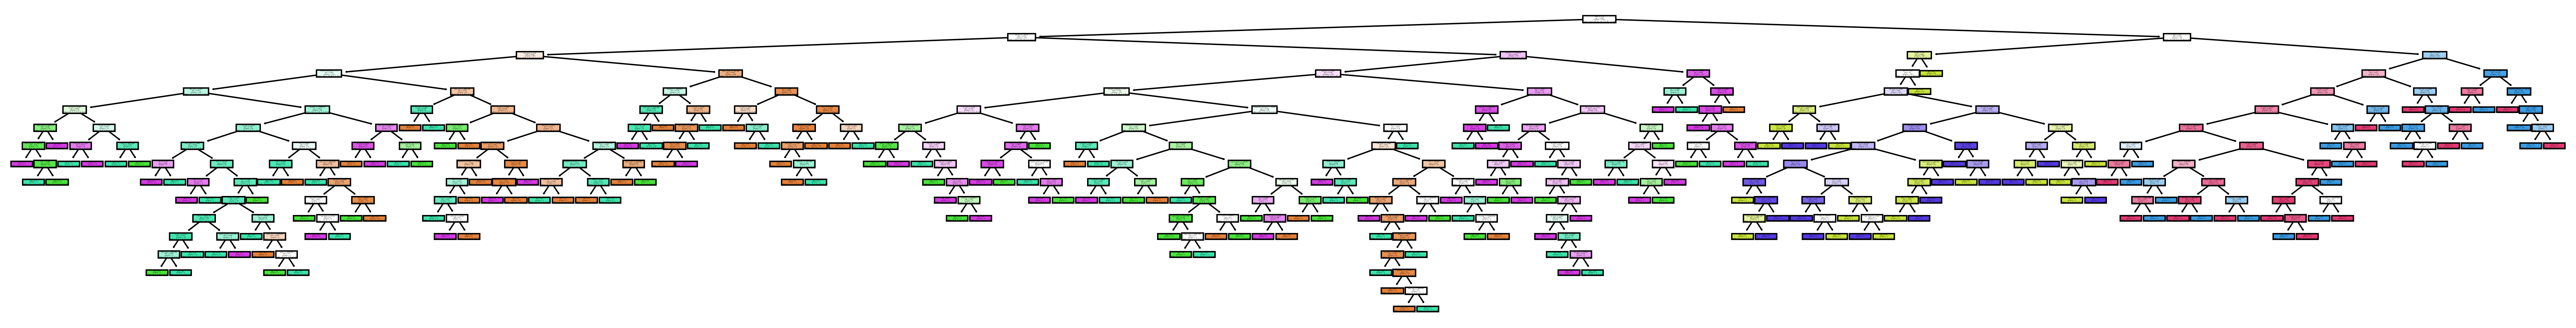

In [33]:
plt.figure(figsize=(33, 4), dpi=300)
plot_tree(dt, feature_names=df.columns, filled=True)
plt.show()

In [34]:
dt.score(X_e_train, y_e_train)

1.0

### Performance evaluation

In [35]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve

# plot_cumulative_gain and plot_lift_curve only work in a binary classification case

In [36]:
y_e_train_pred = dt.predict(X_e_train)
print(accuracy_score(y_e_train, y_e_train_pred))

1.0


In [37]:
y_e_train_pred, y_e_train

(array(['angry', 'angry', 'fearful', ..., 'angry', 'fearful', 'sad'],
       dtype=object),
 array(['angry', 'angry', 'fearful', ..., 'angry', 'fearful', 'sad'],
       dtype=object))

In [38]:
y_e_test_pred = dt.predict(X_e_test)
print(accuracy_score(y_e_test, y_e_test_pred))
print(f1_score(y_e_test, y_e_test_pred, average="macro"))

0.6211812627291242
0.61321772049293


In [39]:
print(classification_report(y_e_test, y_e_test_pred))

              precision    recall  f1-score   support

       angry       0.57      0.58      0.58        74
        calm       0.83      0.79      0.81        76
     disgust       0.41      0.37      0.38        41
     fearful       0.41      0.42      0.42        76
       happy       0.84      0.73      0.78        74
     neutral       0.62      0.68      0.65        38
         sad       0.62      0.63      0.63        73
   surprised       0.59      0.74      0.66        39

    accuracy                           0.62       491
   macro avg       0.61      0.62      0.61       491
weighted avg       0.63      0.62      0.62       491



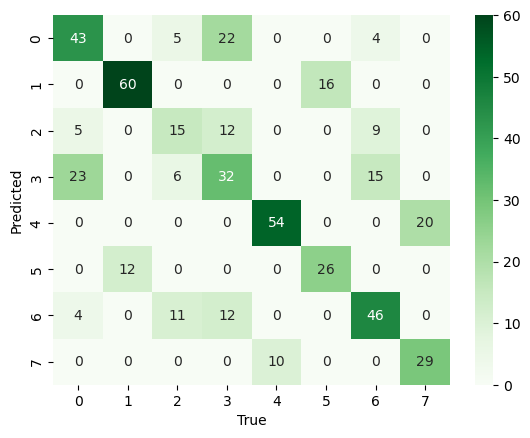

In [40]:
cf = confusion_matrix(y_e_test, y_e_test_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [41]:
y_e_test_pred_proba = dt.predict_proba(X_e_test)

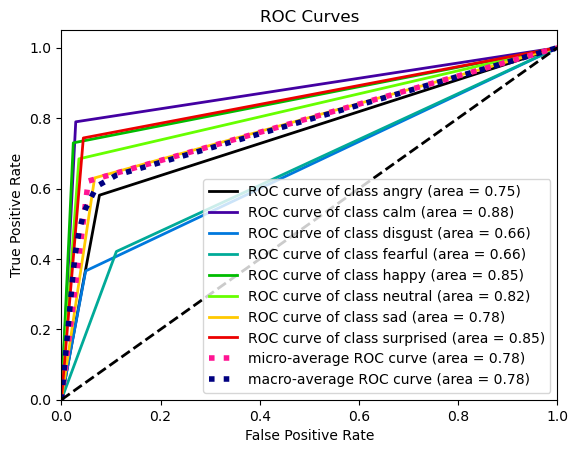

0.7818254481253764


In [42]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_e_test, dt.predict_proba(X_e_test))
plt.show()
print(roc_auc_score(y_e_test, y_e_test_pred_proba, multi_class="ovr", average="macro"))

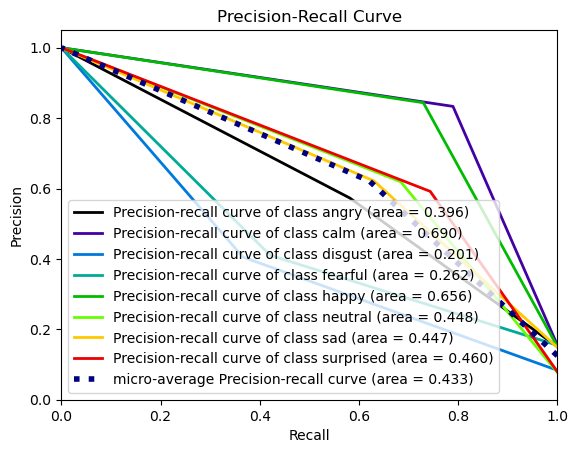

In [43]:
plot_precision_recall(y_e_test, dt.predict_proba(X_e_test))
plt.show()

### Cross-validation 

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
max_depth = 5
dt = DecisionTreeClassifier(max_depth=max_depth)
scores = cross_val_score(dt, X_e_train, y_e_train, cv=5)
cross_val_score(dt, X_e_train, y_e_train, cv=5)

array([0.57641921, 0.59825328, 0.59388646, 0.65938865, 0.61572052])

In [46]:
scores
#why the scores change in each iteration, 
#and scores and the last line of code of the previous cell are not the same?

array([0.5720524 , 0.59825328, 0.58951965, 0.64628821, 0.6069869 ])

### DT hyperparameters 

In [47]:
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std()))

Accuracy: 0.6026 (+/- 0.02)


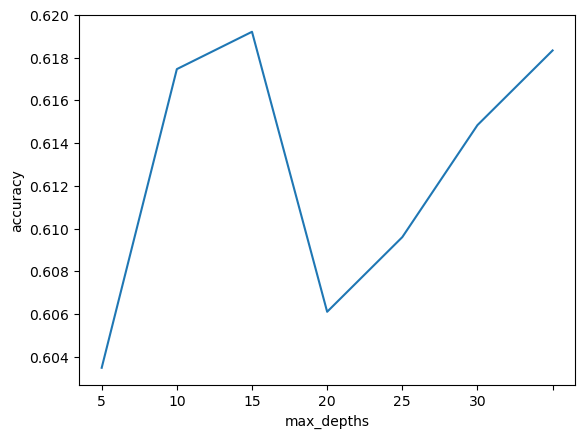

In [48]:
max_depths = [5, 10, 15, 20, 25, 30, None]
scores = list()
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    scores.append(cross_val_score(dt, X_e_train, y_e_train, cv=5).mean())
plt.plot(scores)
plt.xticks(range(len(max_depths)), max_depths)
plt.xlabel("max_depths")
plt.ylabel("accuracy")
plt.show()

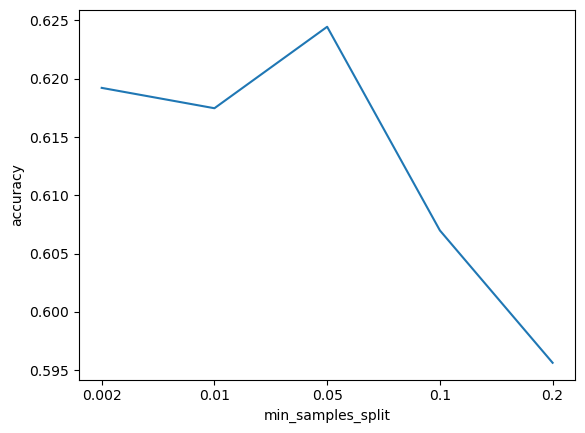

In [49]:
min_samples_splits = [0.002, 0.01, 0.05, 0.1, 0.2]
scores = list()
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    scores.append(cross_val_score(dt, X_e_train, y_e_train, cv=5).mean())
plt.plot(scores)
plt.xticks(range(len(min_samples_splits)), min_samples_splits)
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.show()

### Grid Search

In [50]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [51]:
param_grid = {
    "min_samples_split": [0.002, 0.01, 0.05, 0.1, 0.2],
    "min_samples_leaf": [0.002, 0.01, 0.05, 0.1, 0.2],
    "max_depth": [5, 10, 15, 20, 25, 30, None],
}

grid = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=param_grid,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0),
    n_jobs=-1,
    refit=True,
)

In [52]:
%%time
grid.fit(X_e_train, y_e_train)

Wall time: 35.7 s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=0),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30, None],
                         'min_samples_leaf': [0.002, 0.01, 0.05, 0.1, 0.2],
                         'min_samples_split': [0.002, 0.01, 0.05, 0.1, 0.2]})

In [53]:
clf = grid.best_estimator_

In [54]:
print(grid.best_params_, grid.best_score_)

{'max_depth': 25, 'min_samples_leaf': 0.002, 'min_samples_split': 0.01} 0.62235807860262


In [55]:
clf.score(X_e_test, y_e_test)

0.6558044806517311

#### changing criterions

In [56]:
from scipy.stats import uniform, randint, loguniform

In [57]:
%%time
param_grid = {
    "min_samples_split": loguniform(1e-2, 1e0),
    "min_samples_leaf": uniform(0.001, 0.2),
    "max_depth": randint(2, 200),
    "criterion": ["gini", "entropy", "log_loss"],
}
grid = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    n_iter=200,
)
grid.fit(X_e_train, y_e_train)
clf = grid.best_estimator_

Wall time: 37.3 s


In [58]:
print(grid.best_params_, grid.best_score_)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 0.005471874082886451, 'min_samples_split': 0.03037302635878146} 0.620174672489083


In [59]:
clf.score(X_e_test, y_e_test)

0.6130346232179226

# Decision trees to predict Sex

In [61]:
y_s = np.array(df["sex"]) # <--- this is the variable prediction parameter
df_s = df.drop(columns = ["sex"])
df_s = pd.get_dummies(df_s, columns=["emotional_intensity", "emotion"])
X_s = df_s.values
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(
    X_s, y_s, test_size=0.3, stratify=y_s, random_state=0
)

In [62]:
df_s.T

,0,2,3,4,5,7,8,13,14,15,...,2438,2439,2440,2441,2442,2443,2446,2448,2450,2451
frame_count,179379.000000,224224.000000,174575.000000,211411.000000,171371.000000,164965.000000,180981.000000,216216.000000,241842.000000,233833.000000,...,152152.000000,168168.000000,168168.000000,254655.000000,233834.000000,184184.000000,240240.000000,200200.000000,179379.000000,184184.000000
intensity,-36.793432,-32.290737,-49.019839,-31.214503,-36.312244,-49.095042,-45.906837,-54.745974,-43.823350,-35.549252,...,-48.653291,-43.782281,-43.906073,-26.666414,-29.512788,-47.141749,-36.811776,-43.342901,-45.751265,-40.018044
mfcc_mean,-33.485947,-30.532463,-36.059555,-31.405996,-30.500889,-36.048576,-33.899364,-34.821735,-38.210920,-32.441830,...,-30.060055,-26.460697,-26.366121,-20.926167,-22.787794,-28.682810,-24.805220,-31.160332,-28.242815,-29.019236
mfcc_std,134.654860,126.577110,159.725160,122.125824,132.581730,167.652130,159.197620,164.230010,151.044800,133.173750,...,166.596500,156.474330,149.740360,112.793640,113.349300,154.492430,138.314590,157.499700,159.943400,149.188950
mfcc_min,-755.223450,-726.060360,-842.946350,-700.702760,-719.165470,-910.497440,-879.260000,-926.872200,-863.799700,-747.321200,...,-875.450300,-814.579000,-802.873400,-657.040000,-659.389100,-859.211730,-782.337340,-825.374100,-868.095760,-799.510100
mfcc_max,171.690920,165.456530,190.036090,161.134000,213.681920,220.383730,207.632170,153.926040,168.899730,177.526800,...,228.247680,233.766780,236.998670,201.646970,202.859280,197.396960,219.623290,220.794900,219.843500,219.527800
sc_mean,5792.550744,4830.743037,5376.446478,5146.012474,4251.116912,6085.206268,6349.352394,5481.013422,4324.662405,4952.768904,...,6937.144322,5701.683398,5431.164043,4031.691479,3918.703428,4659.880471,4369.123635,6602.742127,5524.736973,6082.676123
sc_std,3328.055457,3332.131300,4053.663073,3442.724109,3833.178183,3737.829447,4014.630498,2941.101823,3413.398873,3517.024753,...,3599.140064,3267.114214,3068.148140,2692.457051,3149.520778,3663.074145,3194.246906,4191.727090,3596.031841,3963.725117
sc_min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,821.074902,733.838778,882.776720,633.272316,979.297084,0.000000,840.068705,0.000000,760.822547,0.000000
sc_max,13541.959028,12007.751173,12048.223893,12025.582707,12063.200741,12000.006162,12081.507260,12029.892125,12008.679047,12105.853078,...,11978.206937,10667.438981,11760.043064,10365.487164,11981.598019,12192.374121,11191.358052,12064.561791,11981.912464,12199.773419


In [63]:
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(
    X_s, y_s, test_size=0.3, stratify=y_s, random_state=1
)

In [64]:
# with stratify
print(np.unique(y_s, return_counts=True)[1] / len(y_s))
print(np.unique(y_s_train, return_counts=True)[1] / len(y_s_train))
print(np.unique(y_s_test, return_counts=True)[1] / len(y_s_test))

[0.48288509 0.51711491]
[0.48296943 0.51703057]
[0.48268839 0.51731161]


In [65]:
print(X_s_train.shape, X_s_test.shape, y_s_train.shape, y_s_test.shape)

(1145, 35) (491, 35) (1145,) (491,)


In [66]:
%%time
dt.fit(X_s_train, y_s_train)

Wall time: 20.6 ms


DecisionTreeClassifier(min_samples_split=0.2)

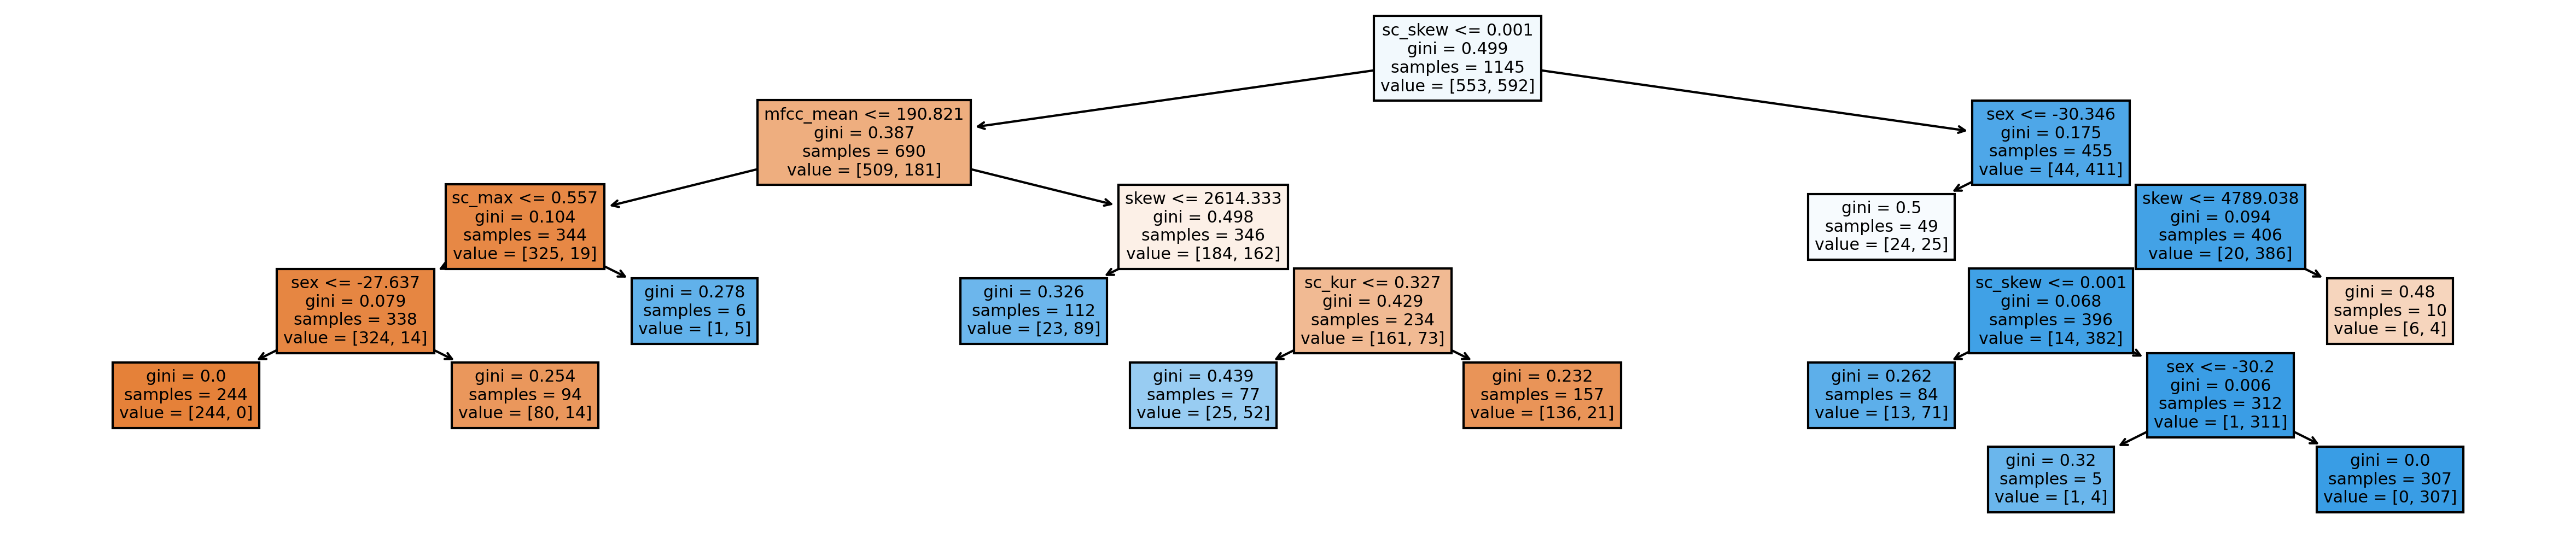

In [67]:
plt.figure(figsize=(20, 4), dpi=300)
plot_tree(dt, feature_names=df.columns, filled=True)
plt.show()

In [68]:
dt.score(X_s_train, y_s_train)

0.8899563318777293

In [69]:
y_s_train_pred = dt.predict(X_s_train)
print(accuracy_score(y_s_train, y_s_train_pred))

0.8899563318777293


In [70]:
y_s_train_pred, y_s_train

(array(['F', 'M', 'M', ..., 'M', 'M', 'M'], dtype=object),
 array(['F', 'M', 'M', ..., 'M', 'M', 'M'], dtype=object))

In [71]:
y_s_test_pred = dt.predict(X_s_test)
print(accuracy_score(y_s_test, y_s_test_pred))
print(f1_score(y_s_test, y_s_test_pred, average="macro"))

0.8411405295315683
0.8396714558424596


In [72]:
print(classification_report(y_s_test, y_s_test_pred))

              precision    recall  f1-score   support

           F       0.88      0.77      0.82       237
           M       0.81      0.91      0.86       254

    accuracy                           0.84       491
   macro avg       0.85      0.84      0.84       491
weighted avg       0.85      0.84      0.84       491



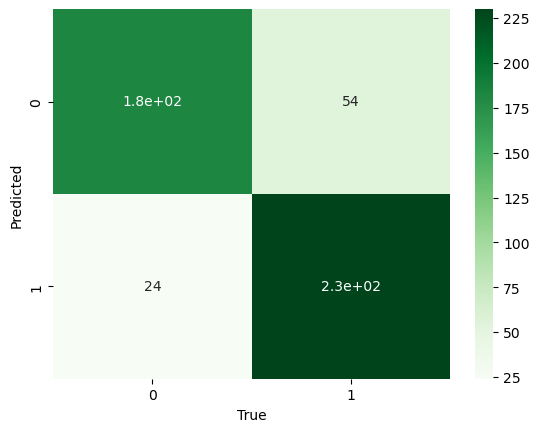

In [73]:
cf = confusion_matrix(y_s_test, y_s_test_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [74]:
y_s_test_pred_proba = dt.predict_proba(X_s_test)

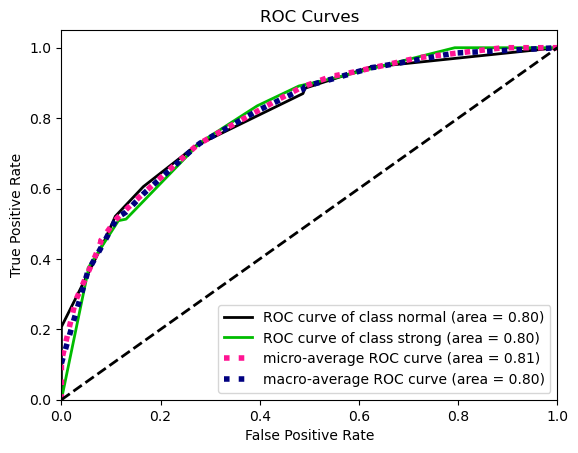

0.8039480259870065


In [111]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_s_test, dt.predict_proba(X_s_test))
plt.show()
print(roc_auc_score(y_s_test, y_s_test_pred_proba[:,1], multi_class="ovr", average="macro"))

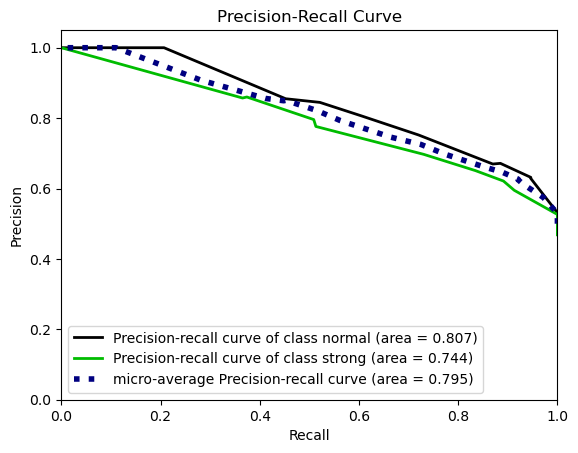

In [112]:
plot_precision_recall(y_s_test, dt.predict_proba(X_s_test))
plt.show()

### Cross-validation 

In [79]:
max_depth = 5
dt = DecisionTreeClassifier(max_depth=max_depth)
scores_s = cross_val_score(dt, X_s_train, y_s_train, cv=5)
cross_val_score(dt, X_s_train, y_s_train, cv=5)

array([0.88646288, 0.86462882, 0.86462882, 0.89519651, 0.88209607])

In [80]:
scores_s
#why the scores change in each iteration, 
#and scores and the last line of code of the previous cell are not the same?

array([0.88209607, 0.86462882, 0.86462882, 0.88646288, 0.88646288])

### DT hyperparameters 

In [81]:
print('Accuracy: %0.4f (+/- %0.2f)' % (scores_s.mean(), scores_s.std()))

Accuracy: 0.8769 (+/- 0.01)


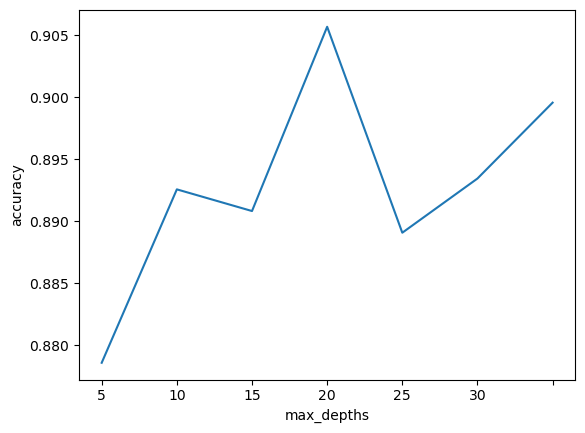

In [82]:
max_depths = [5, 10, 15, 20, 25, 30, None]
scores_s = list()
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    scores_s.append(cross_val_score(dt, X_s_train, y_s_train, cv=5).mean())
plt.plot(scores_s)
plt.xticks(range(len(max_depths)), max_depths)
plt.xlabel("max_depths")
plt.ylabel("accuracy")
plt.show()

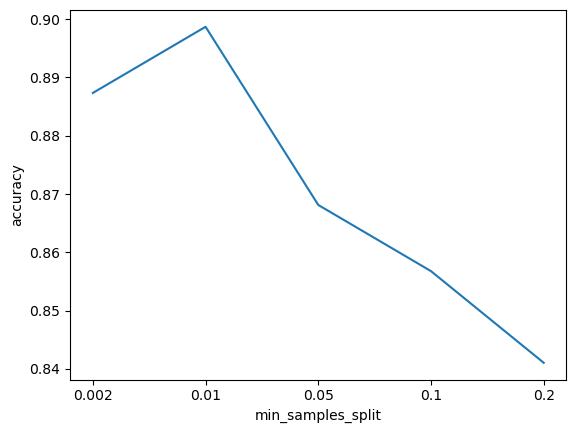

In [83]:
min_samples_splits = [0.002, 0.01, 0.05, 0.1, 0.2]
scores_s = list()
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    scores_s.append(cross_val_score(dt, X_s_train, y_s_train, cv=5).mean())
plt.plot(scores_s)
plt.xticks(range(len(min_samples_splits)), min_samples_splits)
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.show()

### Grid Search

In [84]:
param_grid = {
    "min_samples_split": [0.002, 0.01, 0.05, 0.1, 0.2],
    "min_samples_leaf": [0.002, 0.01, 0.05, 0.1, 0.2],
    "max_depth": [5, 10, 15, 20, 25, 30, None],
}

grid = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=param_grid,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0),
    n_jobs=-1,
    refit=True,
)

In [85]:
%%time
grid.fit(X_s_train, y_s_train)

Wall time: 31 s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=0),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30, None],
                         'min_samples_leaf': [0.002, 0.01, 0.05, 0.1, 0.2],
                         'min_samples_split': [0.002, 0.01, 0.05, 0.1, 0.2]})

In [86]:
clf_s = grid.best_estimator_

In [87]:
print(grid.best_params_, grid.best_score_)

{'max_depth': 20, 'min_samples_leaf': 0.002, 'min_samples_split': 0.002} 0.8975545851528385


In [88]:
clf_s.score(X_s_test, y_s_test)

0.8818737270875764

#### changing criterions

In [89]:
%%time
param_grid = {
    "min_samples_split": loguniform(1e-2, 1e0),
    "min_samples_leaf": uniform(0.001, 0.2),
    "max_depth": randint(2, 200),
    "criterion": ["gini", "entropy", "log_loss"],
}
grid = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    n_iter=200,
)
grid.fit(X_s_train, y_s_train)
clf = grid.best_estimator_

Wall time: 28.3 s


In [90]:
print(grid.best_params_, grid.best_score_)

{'criterion': 'log_loss', 'max_depth': 96, 'min_samples_leaf': 0.007886617916837623, 'min_samples_split': 0.01259186590428582} 0.9029694323144105


In [91]:
clf.score(X_s_test, y_s_test)

0.890020366598778

# Decision trees to predict Emotional intensity

In [93]:
y_s = np.array(df["emotional_intensity"]) # <--- this is the variable prediction parameter
df_s = df.drop(columns = ["emotional_intensity"])
df_s = pd.get_dummies(df_s, columns=["sex","emotion"])
X_s = df_s.values
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(
    X_s, y_s, test_size=0.3, stratify=y_s, random_state=0
)

In [94]:
df_s.T

,0,2,3,4,5,7,8,13,14,15,...,2438,2439,2440,2441,2442,2443,2446,2448,2450,2451
frame_count,179379.000000,224224.000000,174575.000000,211411.000000,171371.000000,164965.000000,180981.000000,216216.000000,241842.000000,233833.000000,...,152152.000000,168168.000000,168168.000000,254655.000000,233834.000000,184184.000000,240240.000000,200200.000000,179379.000000,184184.000000
intensity,-36.793432,-32.290737,-49.019839,-31.214503,-36.312244,-49.095042,-45.906837,-54.745974,-43.823350,-35.549252,...,-48.653291,-43.782281,-43.906073,-26.666414,-29.512788,-47.141749,-36.811776,-43.342901,-45.751265,-40.018044
mfcc_mean,-33.485947,-30.532463,-36.059555,-31.405996,-30.500889,-36.048576,-33.899364,-34.821735,-38.210920,-32.441830,...,-30.060055,-26.460697,-26.366121,-20.926167,-22.787794,-28.682810,-24.805220,-31.160332,-28.242815,-29.019236
mfcc_std,134.654860,126.577110,159.725160,122.125824,132.581730,167.652130,159.197620,164.230010,151.044800,133.173750,...,166.596500,156.474330,149.740360,112.793640,113.349300,154.492430,138.314590,157.499700,159.943400,149.188950
mfcc_min,-755.223450,-726.060360,-842.946350,-700.702760,-719.165470,-910.497440,-879.260000,-926.872200,-863.799700,-747.321200,...,-875.450300,-814.579000,-802.873400,-657.040000,-659.389100,-859.211730,-782.337340,-825.374100,-868.095760,-799.510100
mfcc_max,171.690920,165.456530,190.036090,161.134000,213.681920,220.383730,207.632170,153.926040,168.899730,177.526800,...,228.247680,233.766780,236.998670,201.646970,202.859280,197.396960,219.623290,220.794900,219.843500,219.527800
sc_mean,5792.550744,4830.743037,5376.446478,5146.012474,4251.116912,6085.206268,6349.352394,5481.013422,4324.662405,4952.768904,...,6937.144322,5701.683398,5431.164043,4031.691479,3918.703428,4659.880471,4369.123635,6602.742127,5524.736973,6082.676123
sc_std,3328.055457,3332.131300,4053.663073,3442.724109,3833.178183,3737.829447,4014.630498,2941.101823,3413.398873,3517.024753,...,3599.140064,3267.114214,3068.148140,2692.457051,3149.520778,3663.074145,3194.246906,4191.727090,3596.031841,3963.725117
sc_min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,821.074902,733.838778,882.776720,633.272316,979.297084,0.000000,840.068705,0.000000,760.822547,0.000000
sc_max,13541.959028,12007.751173,12048.223893,12025.582707,12063.200741,12000.006162,12081.507260,12029.892125,12008.679047,12105.853078,...,11978.206937,10667.438981,11760.043064,10365.487164,11981.598019,12192.374121,11191.358052,12064.561791,11981.912464,12199.773419


In [95]:
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(
    X_s, y_s, test_size=0.3, stratify=y_s, random_state=1
)

In [96]:
# with stratify
print(np.unique(y_s, return_counts=True)[1] / len(y_s))
print(np.unique(y_s_train, return_counts=True)[1] / len(y_s_train))
print(np.unique(y_s_test, return_counts=True)[1] / len(y_s_test))

[0.53178484 0.46821516]
[0.53187773 0.46812227]
[0.53156823 0.46843177]


In [97]:
print(X_s_train.shape, X_s_test.shape, y_s_train.shape, y_s_test.shape)

(1145, 35) (491, 35) (1145,) (491,)


In [98]:
%%time
dt.fit(X_s_train, y_s_train)

Wall time: 15.9 ms


DecisionTreeClassifier(min_samples_split=0.2)

In [114]:
df.columns

Index(['emotion', 'emotional_intensity', 'sex', 'frame_count', 'intensity',
       'mfcc_mean', 'mfcc_std', 'mfcc_min', 'mfcc_max', 'sc_mean', 'sc_std',
       'sc_min', 'sc_max', 'sc_kur', 'sc_skew', 'stft_mean', 'stft_std',
       'stft_min', 'stft_kur', 'stft_skew', 'std', 'min', 'max', 'kur', 'skew',
       'emotion_positivity', 'length', 'zero_crossings_rate'],
      dtype='object')

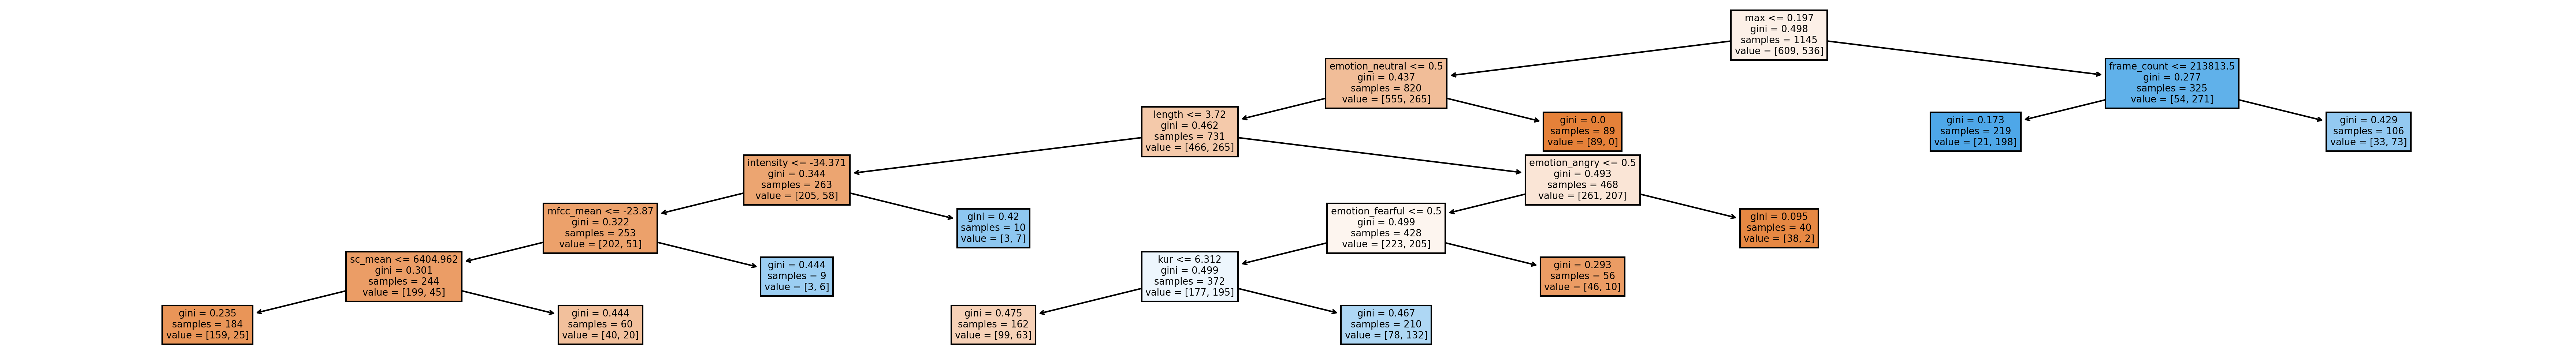

In [115]:
plt.figure(figsize=(30, 4), dpi=300)
plot_tree(dt, feature_names=df_s.columns, filled=True)
plt.show()

In [101]:
dt.score(X_s_train, y_s_train)

0.7746724890829695

In [102]:
y_s_train_pred = dt.predict(X_s_train)
print(accuracy_score(y_s_train, y_s_train_pred))

0.7746724890829695


In [103]:
y_s_train_pred, y_s_train

(array(['strong', 'strong', 'strong', ..., 'normal', 'strong', 'strong'],
       dtype=object),
 array(['strong', 'normal', 'normal', ..., 'normal', 'strong', 'strong'],
       dtype=object))

In [104]:
y_s_test_pred = dt.predict(X_s_test)
print(accuracy_score(y_s_test, y_s_test_pred))
print(f1_score(y_s_test, y_s_test_pred, average="macro"))

0.725050916496945
0.7245939646253754


In [105]:
print(classification_report(y_s_test, y_s_test_pred))

              precision    recall  f1-score   support

      normal       0.75      0.72      0.74       261
      strong       0.70      0.73      0.71       230

    accuracy                           0.73       491
   macro avg       0.72      0.73      0.72       491
weighted avg       0.73      0.73      0.73       491



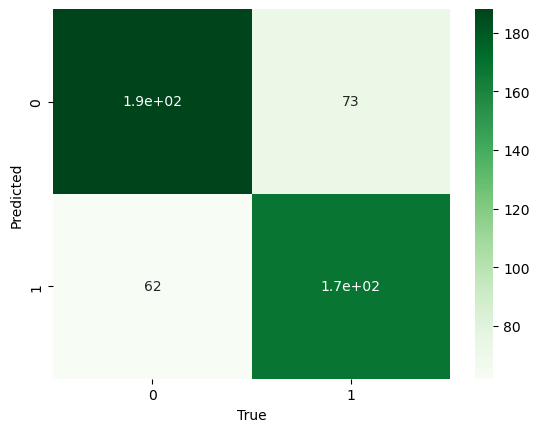

In [106]:
cf = confusion_matrix(y_s_test, y_s_test_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [107]:
y_s_test_pred_proba = dt.predict_proba(X_s_test)

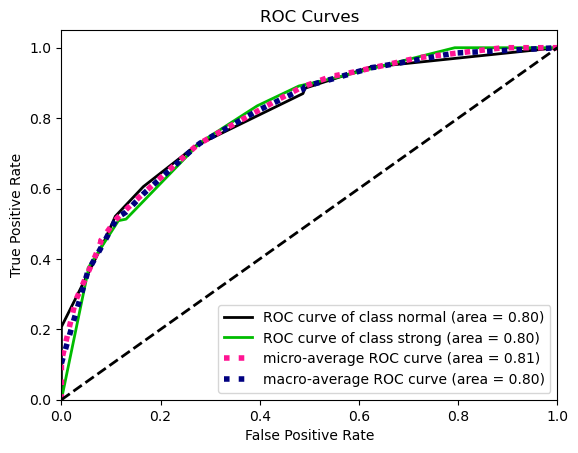

0.8039480259870065


In [113]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_s_test, dt.predict_proba(X_s_test))
plt.show()
print(roc_auc_score(y_s_test, y_s_test_pred_proba[:,1], multi_class="ovr", average="macro"))

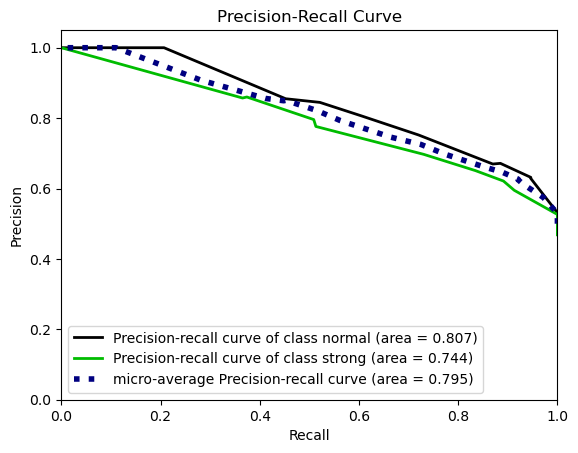

In [109]:
plot_precision_recall(y_s_test, dt.predict_proba(X_s_test))
plt.show()

# Decision trees to predict Emotion positivity

### Partition 

In [9]:
df.T

,0,4,5,7,8,14,15,16,17,18,...,2435,2436,2438,2439,2440,2441,2442,2443,2448,2450
vocal_channel,speech,song,speech,speech,speech,song,song,speech,speech,speech,...,speech,song,speech,speech,speech,song,song,speech,speech,speech
emotion,fearful,happy,fearful,neutral,calm,sad,sad,calm,fearful,angry,...,surprised,happy,fearful,calm,neutral,sad,sad,calm,calm,surprised
emotional_intensity,normal,strong,normal,normal,normal,normal,normal,strong,strong,strong,...,normal,strong,normal,normal,normal,strong,strong,normal,normal,normal
sex,F,F,F,F,F,F,F,F,F,F,...,M,M,M,M,M,M,M,M,M,M
frame_count,179379.0,211411.0,171371.0,164965.0,180981.0,241842.0,233833.0,190590.0,179379.0,187388.0,...,152152.0,205005.0,152152.0,168168.0,168168.0,254655.0,233834.0,184184.0,200200.0,179379.0
intensity,-36.793432,-31.214503,-36.312244,-49.095042,-45.906837,-43.82335,-35.549252,-47.831966,-22.367588,-27.461209,...,-36.191724,-36.775127,-48.653291,-43.782281,-43.906073,-26.666414,-29.512788,-47.141749,-43.342901,-45.751265
mfcc_mean,-33.485947,-31.405996,-30.500889,-36.048576,-33.899364,-38.21092,-32.44183,-33.729385,-23.537529,-25.791014,...,-25.970781,-28.4094,-30.060055,-26.460697,-26.366121,-20.926167,-22.787794,-28.68281,-31.160332,-28.242815
mfcc_std,134.65486,122.125824,132.58173,167.65213,159.19762,151.0448,133.17375,160.28496,97.46727,111.2614,...,140.39853,136.80605,166.5965,156.47433,149.74036,112.79364,113.3493,154.49243,157.4997,159.9434
mfcc_min,-755.22345,-700.70276,-719.16547,-910.49744,-879.26,-863.7997,-747.3212,-868.4098,-550.5658,-612.66284,...,-755.2535,-784.12555,-875.4503,-814.579,-802.8734,-657.04,-659.3891,-859.21173,-825.3741,-868.09576
mfcc_max,171.69092,161.134,213.68192,220.38373,207.63217,168.89973,177.5268,207.53506,182.44167,193.28554,...,196.67453,225.15775,228.24768,233.76678,236.99867,201.64697,202.85928,197.39696,220.7949,219.8435


In [116]:
y_ep = np.array(df["emotion_positivity"]) # <--- this is the variable prediction parameter
df_ep = df.drop(columns = ["emotion_positivity"])
df_ep = pd.get_dummies(df_ep, columns=["emotional_intensity", "sex","emotion"])

In [117]:
df_ep.T

,0,2,3,4,5,7,8,13,14,15,...,2438,2439,2440,2441,2442,2443,2446,2448,2450,2451
frame_count,179379.000000,224224.000000,174575.000000,211411.000000,171371.000000,164965.000000,180981.000000,216216.000000,241842.000000,233833.000000,...,152152.000000,168168.000000,168168.000000,254655.000000,233834.000000,184184.000000,240240.000000,200200.000000,179379.000000,184184.000000
intensity,-36.793432,-32.290737,-49.019839,-31.214503,-36.312244,-49.095042,-45.906837,-54.745974,-43.823350,-35.549252,...,-48.653291,-43.782281,-43.906073,-26.666414,-29.512788,-47.141749,-36.811776,-43.342901,-45.751265,-40.018044
mfcc_mean,-33.485947,-30.532463,-36.059555,-31.405996,-30.500889,-36.048576,-33.899364,-34.821735,-38.210920,-32.441830,...,-30.060055,-26.460697,-26.366121,-20.926167,-22.787794,-28.682810,-24.805220,-31.160332,-28.242815,-29.019236
mfcc_std,134.654860,126.577110,159.725160,122.125824,132.581730,167.652130,159.197620,164.230010,151.044800,133.173750,...,166.596500,156.474330,149.740360,112.793640,113.349300,154.492430,138.314590,157.499700,159.943400,149.188950
mfcc_min,-755.223450,-726.060360,-842.946350,-700.702760,-719.165470,-910.497440,-879.260000,-926.872200,-863.799700,-747.321200,...,-875.450300,-814.579000,-802.873400,-657.040000,-659.389100,-859.211730,-782.337340,-825.374100,-868.095760,-799.510100
mfcc_max,171.690920,165.456530,190.036090,161.134000,213.681920,220.383730,207.632170,153.926040,168.899730,177.526800,...,228.247680,233.766780,236.998670,201.646970,202.859280,197.396960,219.623290,220.794900,219.843500,219.527800
sc_mean,5792.550744,4830.743037,5376.446478,5146.012474,4251.116912,6085.206268,6349.352394,5481.013422,4324.662405,4952.768904,...,6937.144322,5701.683398,5431.164043,4031.691479,3918.703428,4659.880471,4369.123635,6602.742127,5524.736973,6082.676123
sc_std,3328.055457,3332.131300,4053.663073,3442.724109,3833.178183,3737.829447,4014.630498,2941.101823,3413.398873,3517.024753,...,3599.140064,3267.114214,3068.148140,2692.457051,3149.520778,3663.074145,3194.246906,4191.727090,3596.031841,3963.725117
sc_min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,821.074902,733.838778,882.776720,633.272316,979.297084,0.000000,840.068705,0.000000,760.822547,0.000000
sc_max,13541.959028,12007.751173,12048.223893,12025.582707,12063.200741,12000.006162,12081.507260,12029.892125,12008.679047,12105.853078,...,11978.206937,10667.438981,11760.043064,10365.487164,11981.598019,12192.374121,11191.358052,12064.561791,11981.912464,12199.773419


In [140]:
X_ep = df_ep.values

In [141]:
X_ep_train, X_ep_test, y_ep_train, y_ep_test = train_test_split(
    X_ep, y_ep, test_size=0.3, stratify=y_ep, random_state=1
)

In [142]:
# with stratify
print(np.unique(y_ep, return_counts=True)[1] / len(y_ep))
print(np.unique(y_ep_train, return_counts=True)[1] / len(y_ep_train))
print(np.unique(y_ep_test, return_counts=True)[1] / len(y_ep_test))

[0.53789731 0.23227384 0.22982885]
[0.53799127 0.23231441 0.22969432]
[0.53767821 0.23217923 0.23014257]


In [143]:
print(X_ep_train.shape, X_ep_test.shape, y_ep_train.shape, y_ep_test.shape)

(1145, 36) (491, 36) (1145,) (491,)


### DT 

In [144]:
dt = DecisionTreeClassifier()

In [145]:
%%time
dt.fit(X_ep_train, y_ep_train)

Wall time: 12.8 ms


DecisionTreeClassifier()

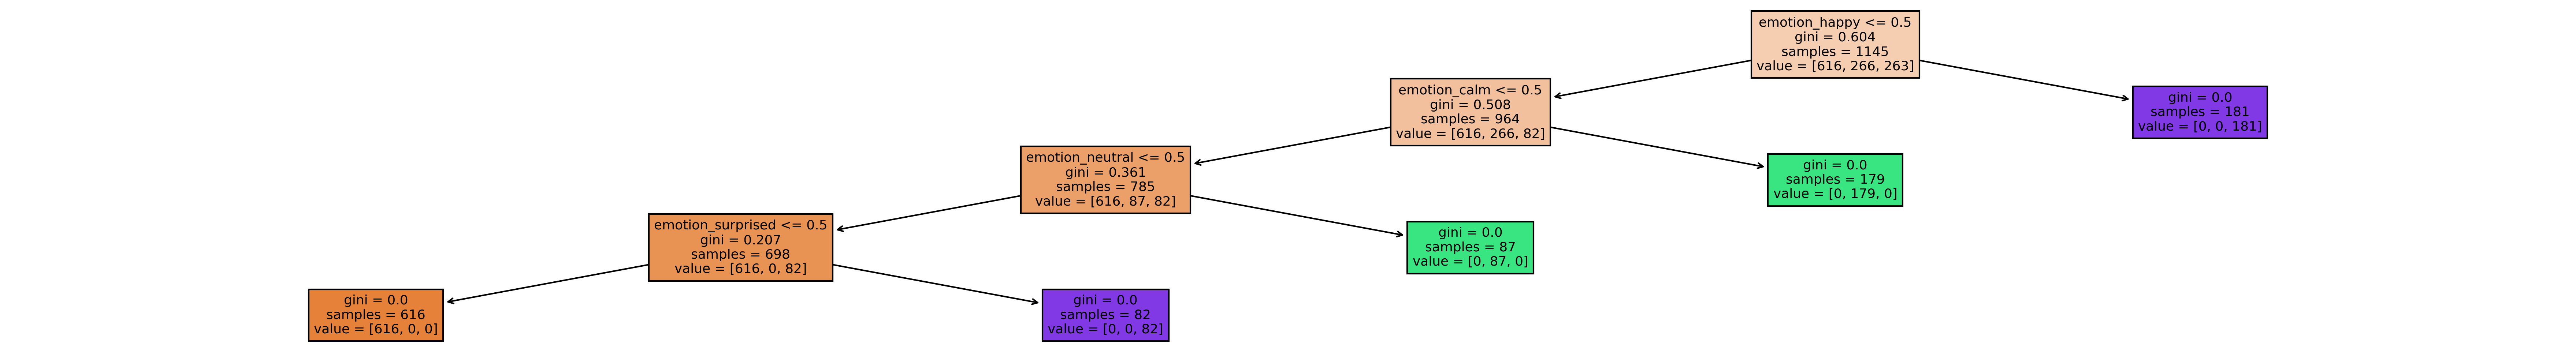

In [146]:
plt.figure(figsize=(30, 4), dpi=300)
plot_tree(dt, feature_names=df_ep.columns, filled=True)
plt.show()

In [147]:
dt.score(X_ep_train, y_ep_train)

1.0

### Performance evaluation

In [148]:
y_ep_train_pred = dt.predict(X_ep_train)
print(accuracy_score(y_ep_train, y_ep_train_pred))

1.0


In [129]:
y_ep_train_pred, y_ep_train

(array([-1, -1, -1, ..., -1, -1, -1], dtype=int64),
 array([-1, -1, -1, ..., -1, -1, -1], dtype=int64))

In [130]:
y_ep_test_pred = dt.predict(X_ep_test)
print(accuracy_score(y_ep_test, y_ep_test_pred))
print(f1_score(y_ep_test, y_ep_test_pred, average="macro"))

1.0
1.0


In [149]:
print(classification_report(y_ep_test, y_ep_test_pred))

              precision    recall  f1-score   support

          -1       0.50      0.50      0.50       264
           0       0.21      0.21      0.21       114
           1       0.27      0.27      0.27       113

    accuracy                           0.38       491
   macro avg       0.33      0.33      0.33       491
weighted avg       0.38      0.38      0.38       491



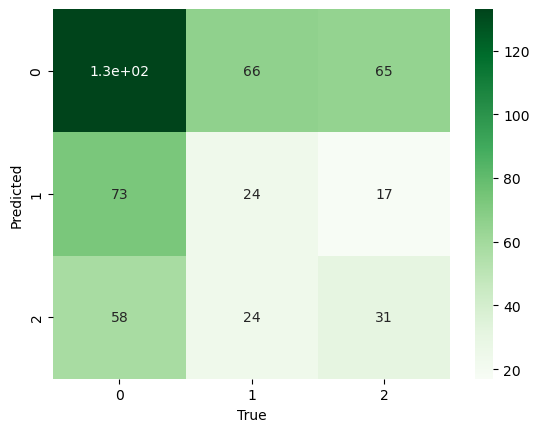

In [150]:
cf = confusion_matrix(y_ep_test, y_ep_test_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [151]:
y_ep_test_pred_proba = dt.predict_proba(X_ep_test)

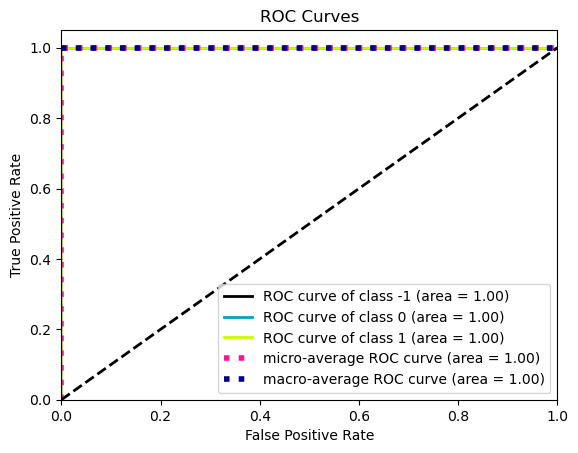

1.0


In [152]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_ep_test, dt.predict_proba(X_ep_test))
plt.show()
print(roc_auc_score(y_ep_test, y_ep_test_pred_proba, multi_class="ovr", average="macro"))

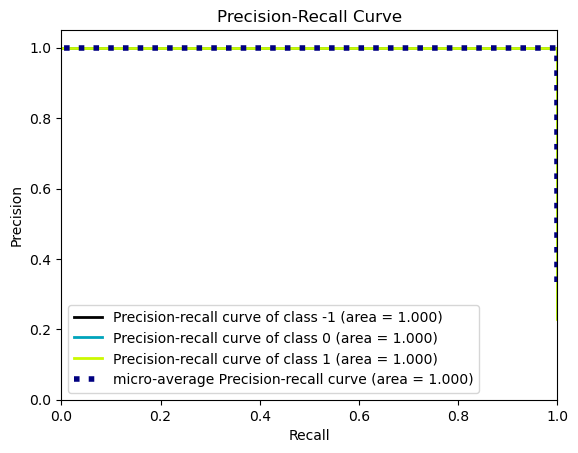

In [153]:
plot_precision_recall(y_ep_test, dt.predict_proba(X_ep_test))
plt.show()

### Cross-validation 

In [154]:
max_depth = 5
dt = DecisionTreeClassifier(max_depth=max_depth)
scores = cross_val_score(dt, X_ep_train, y_ep_train, cv=5)
cross_val_score(dt, X_ep_train, y_ep_train, cv=5)

array([1., 1., 1., 1., 1.])

In [155]:
scores
#why the scores change in each iteration, 
#and scores and the last line of code of the previous cell are not the same?

array([1., 1., 1., 1., 1.])

### DT hyperparameters 

In [156]:
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std()))

Accuracy: 1.0000 (+/- 0.00)


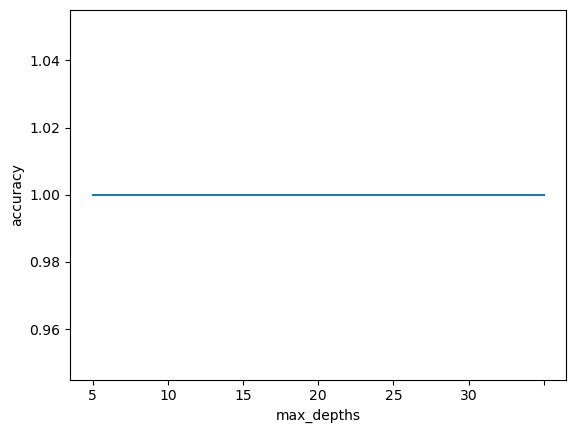

In [157]:
max_depths = [5, 10, 15, 20, 25, 30, None]
scores = list()
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    scores.append(cross_val_score(dt, X_ep_train, y_ep_train, cv=5).mean())
plt.plot(scores)
plt.xticks(range(len(max_depths)), max_depths)
plt.xlabel("max_depths")
plt.ylabel("accuracy")
plt.show()

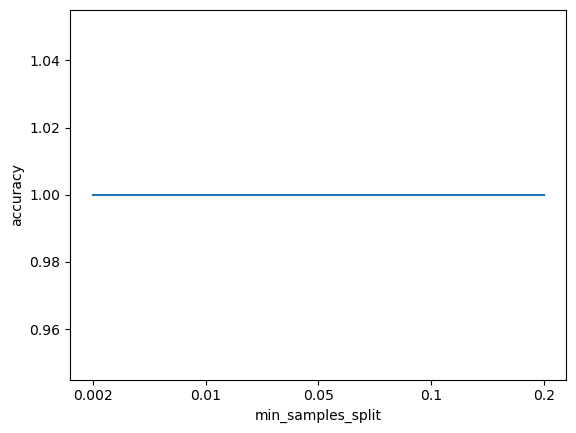

In [158]:
min_samples_splits = [0.002, 0.01, 0.05, 0.1, 0.2]
scores = list()
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    scores.append(cross_val_score(dt, X_ep_train, y_ep_train, cv=5).mean())
plt.plot(scores)
plt.xticks(range(len(min_samples_splits)), min_samples_splits)
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.show()

### Grid Search

In [50]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [159]:
param_grid = {
    "min_samples_split": [0.002, 0.01, 0.05, 0.1, 0.2],
    "min_samples_leaf": [0.002, 0.01, 0.05, 0.1, 0.2],
    "max_depth": [5, 10, 15, 20, 25, 30, None],
}

grid = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=param_grid,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0),
    n_jobs=-1,
    refit=True,
)

In [160]:
%%time
grid.fit(X_ep_train, y_ep_train)

Wall time: 38.6 s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=0),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30, None],
                         'min_samples_leaf': [0.002, 0.01, 0.05, 0.1, 0.2],
                         'min_samples_split': [0.002, 0.01, 0.05, 0.1, 0.2]})

In [161]:
clf = grid.best_estimator_

In [162]:
print(grid.best_params_, grid.best_score_)

{'max_depth': 5, 'min_samples_leaf': 0.002, 'min_samples_split': 0.002} 1.0


In [163]:
clf.score(X_ep_test, y_ep_test)

1.0

#### changing criterions

In [167]:
%%time
param_grid = {
    "min_samples_split": loguniform(1e-2, 1e0),
    "min_samples_leaf": uniform(0.001, 0.2),
    "max_depth": randint(2, 200),
    "criterion": ["gini", "entropy", "log_loss"],
}
grid = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    n_iter=200,
)
grid.fit(X_ep_train, y_ep_train)
clf = grid.best_estimator_

Wall time: 1min


In [168]:
print(grid.best_params_, grid.best_score_)

{'criterion': 'gini', 'max_depth': 183, 'min_samples_leaf': 0.01172025429932011, 'min_samples_split': 0.5544983289415751} 1.0


In [169]:
clf.score(X_ep_test, y_ep_test)

1.0